In [1]:
pip install pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### PRUEBA 1 - SIN ONTOLOGIA (8 FEATURES EXTRAIDAS MANUALMENTE)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# ===============================
# 0. Cargar dataset
# ===============================
df = pd.read_csv("/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student-mat.csv", sep=";")

# ===============================
# 1. Modelo Baseline (8 features conocidas)
# ===============================
selected_features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'goout', 'Dalc', 'Walc']
X = df[selected_features]
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_simple = RandomForestRegressor(random_state=42)
model_simple.fit(X_train, y_train)
y_pred = model_simple.predict(X_test)

mse_simple = mean_squared_error(y_test, y_pred)
r2_simple = r2_score(y_test, y_pred)

# ===============================
# 2. Modelo con Top 10 Features por correlación
# ===============================
correlations = df.corr(numeric_only=True)['G3'].sort_values(ascending=False)
top_features = correlations.drop('G3').head(10).index.tolist()

X_top = df[top_features]
y_top = df['G3']

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.2, random_state=42)

model_top = RandomForestRegressor(random_state=42)
model_top.fit(X_train_top, y_train_top)
y_pred_top = model_top.predict(X_test_top)

mse_top = mean_squared_error(y_test_top, y_pred_top)
r2_top = r2_score(y_test_top, y_pred_top)

# ===============================
# 3. Resultados
# ===============================
results = {
    "Baseline MSE": mse_simple,
    "Baseline R2": r2_simple,
    "Top Correlated MSE": mse_top,
    "Top Correlated R2": r2_top
}

print(results)

{'Baseline MSE': 3.1980499018987345, 'Baseline R2': 0.8440359653850061, 'Top Correlated MSE': 2.92150253164557, 'Top Correlated R2': 0.8575227604475979}


### PRUEBA 2 - SIN ONTOLOGIA (CALCULO DE LAS 10 FEATURES MEJOR CORRELACIONADAS CON G3)

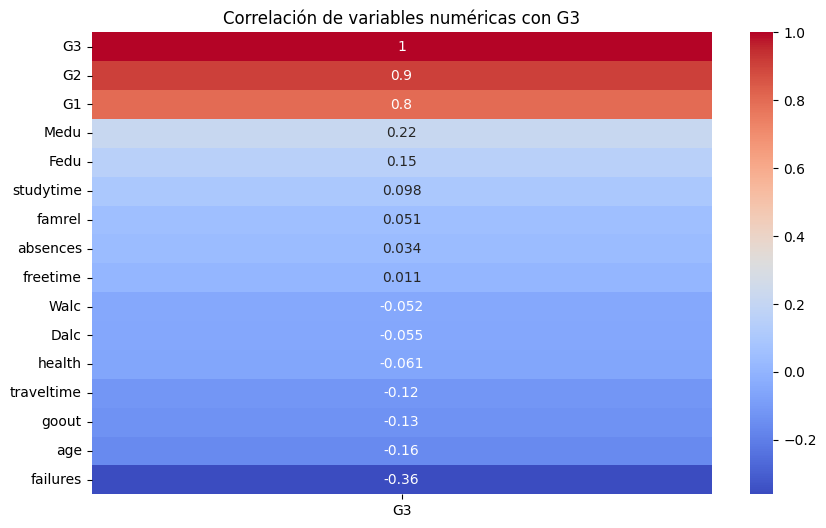

Resultados comparativos:
Baseline (8 features): MSE = 3.20, R² = 0.84
Top 10 Correlated: MSE = 2.92, R² = 0.86


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ===============================
# 0. Cargar dataset
# ===============================
df = pd.read_csv("/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student-mat.csv", sep=";")

# ===============================
# 1. Visualización de correlaciones
# ===============================
correlation_matrix = df.corr(numeric_only=True)
top_corr = correlation_matrix['G3'].drop('G3').sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix[['G3']].sort_values(by='G3', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlación de variables numéricas con G3")
plt.show()

# ===============================
# 2. Modelo Baseline (8 features conocidas)
# ===============================
baseline_features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'goout', 'Dalc', 'Walc']
X_base = df[baseline_features]
y = df['G3']

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y, test_size=0.2, random_state=42)

model_base = RandomForestRegressor(random_state=42)
model_base.fit(X_train_base, y_train_base)
y_pred_base = model_base.predict(X_test_base)

mse_base = mean_squared_error(y_test_base, y_pred_base)
r2_base = r2_score(y_test_base, y_pred_base)

# ===============================
# 3. Modelo con Top 10 Features por correlación
# ===============================
top10_features = top_corr.head(10).index.tolist()
X_top = df[top10_features]

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

model_top = RandomForestRegressor(random_state=42)
model_top.fit(X_train_top, y_train_top)
y_pred_top = model_top.predict(X_test_top)

mse_top = mean_squared_error(y_test_top, y_pred_top)
r2_top = r2_score(y_test_top, y_pred_top)

# ===============================
# 4. Resultados Comparativos
# ===============================
results = {
    "Baseline (8 features)": {"MSE": mse_base, "R2": r2_base},
    "Top 10 Correlated": {"MSE": mse_top, "R2": r2_top}
}

print("Resultados comparativos:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R² = {metrics['R2']:.2f}")


## INTEGRACION DE LA ONTOLOGIA 

### Visualizacion de las clases ontologicas

In [4]:
import rdflib

# Cargar la ontología TTL
g = rdflib.Graph()
ttl_path = "/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student_ontology2.ttl"
g.parse(ttl_path, format="turtle")

# Obtener clases y sus comentarios
classes = []
for s in g.subjects(rdflib.RDF.type, rdflib.OWL.Class):
    comment = g.value(subject=s, predicate=rdflib.RDFS.comment)
    if comment:
        classes.append((s.split("#")[-1], str(comment)))

# Mostrar resumen de clases presentes
pd.DataFrame(classes, columns=["Class", "Comment"])


,Class,Comment
0,Father,Specifically a father guardian.
1,Mother,Specifically a mother guardian.
2,OtherGuardian,Non-mother/father guardian.
3,ParentsOccupation,Educational and professional background of par...
4,Reason,"Reason for choosing the school: home, reputati..."
5,School,Represents a school (GP or MS).
6,HealthAndWellBeing,Student's physical/mental well-being and habits.
7,Infrastructure,Access to school and technological resources.
8,Job,"Possible job categories: teacher, health, serv..."
9,SocialBehaviour,Social and emotional student data.


In [6]:
# Uso de todas las features relevantes agrupadas por su clase ontológica
# Crear grupos de columnas por categoría basada en la ontología

grouped_features = {
    "AcademicPerformance": ['G1', 'G2', 'failures'],
    "StudyHabits": ['studytime', 'schoolsup', 'famsup', 'paid'],
    "HealthAndWellBeing": ['health', 'absences', 'Dalc', 'Walc'],
    "SocialBehaviour": ['goout', 'romantic', 'freetime'],
    "Infrastructure": ['internet', 'traveltime'],
    "Family": ['famsize', 'Pstatus'],
    "ParentsOccupation": ['Medu', 'Fedu', 'Mjob', 'Fjob'],
    "Demographics": ['age', 'sex', 'address', 'guardian'],
    "Target": ['G3']
}

# Unimos todas las columnas únicas para el modelo
columns_for_model = sum([v for k, v in grouped_features.items() if k != 'Target'], [])

# Cargar y preparar dataset
df = pd.read_csv("/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student-mat.csv", sep=";")

# Subset con columnas seleccionadas
df_semantic = df[columns_for_model + grouped_features['Target']]

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df_semantic, drop_first=True)

# Dividir features y target
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model_semantic = RandomForestRegressor(random_state=42)
model_semantic.fit(X_train, y_train)

# Predicción
y_pred_semantic = model_semantic.predict(X_test)

# Evaluación
mse_semantic = mean_squared_error(y_test, y_pred_semantic)
r2_semantic = r2_score(y_test, y_pred_semantic)

# Comparar con el baseline anterior
results.update({
    "Ontology-Based MSE": mse_semantic,
    "Ontology-Based R2": r2_semantic
})

results

{'Baseline (8 features)': {'MSE': 3.1980499018987345,
  'R2': 0.8440359653850061},
 'Top 10 Correlated': {'MSE': 2.92150253164557, 'R2': 0.8575227604475979},
 'Ontology-Based MSE': 3.446567088607594,
 'Ontology-Based R2': 0.831916159784953}

# Prueba de razonamiento automatico en la ontologia

In [ ]:
pip install owlready2

In [10]:
import rdflib

# Ruta del archivo TTL original
ttl_path = "/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student_ontology2.ttl"

# Cargar y convertir a RDF/XML (.owl)
g = rdflib.Graph()
g.parse(ttl_path, format="turtle")
owl_path = ttl_path.replace(".ttl", ".owl")
g.serialize(destination=owl_path, format="xml")
print(f"✔️ Ontología convertida y guardada en: {owl_path}")


✔️ Ontología convertida y guardada en: /Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student_ontology2.owl


In [11]:
from owlready2 import get_ontology, sync_reasoner_pellet
import pandas as pd

# Cargar la ontología .owl ya convertida
onto = get_ontology(f"file://{owl_path}").load()

# Ejecutar razonamiento lógico
with onto:
    sync_reasoner_pellet(infer_property_values=True, infer_data_property_values=True)

# Listar todas las instancias y sus clases inferidas
students = list(onto.individuals())
student_info = []

for ind in students:
    types = list(ind.is_a)
    student_info.append((ind.name, [t.name for t in types]))

pd.DataFrame(student_info, columns=["Instance", "Inferred Types"])


* Owlready2 * Running Pellet...
    java -Xmx2000M -cp /Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/httpclient-4.2.3.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/aterm-java-1.6.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/xercesImpl-2.10.0.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/slf4j-api-1.6.4.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/jena-tdb-0.10.0.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/jena-iri-0.9.5.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/owlapi-distribution-3.4.3-bin.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/jcl-over-slf4j-1.6.4.jar:/Users/danielagomez/Library/Python/3.9/lib/python/site-packages/owlready2/pellet/slf4j-log4j12-1.6.4.jar:/Users/danie

,Instance,Inferred Types


-> Cabe recalcar que la tabla de Instance e Inferred Types esta vacia porque no se han creado instancias.

### Visualizacion de las relaciones entre entidades/clases ontologicas

In [12]:
import rdflib
import pandas as pd

# Cargar la ontología TTL
g = rdflib.Graph()
ttl_path = "/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student_ontology2.ttl"
g.parse(ttl_path, format="turtle")

# Función para obtener propiedades de dominio Student agrupadas por clases
def get_features_by_class(graph, domain_uri):
    feature_map = {}
    
    for s, p, o in graph.triples((None, rdflib.RDFS.domain, rdflib.URIRef(domain_uri))):
        # Identificar si es propiedad de datos o de objeto
        label = None
        if (s, rdflib.RDF.type, rdflib.OWL.DatatypeProperty) in graph:
            label = "DatatypeProperty"
        elif (s, rdflib.RDF.type, rdflib.OWL.ObjectProperty) in graph:
            label = "ObjectProperty"

        if label:
            # Obtener la clase de rango para agrupar
            range_class = graph.value(subject=s, predicate=rdflib.RDFS.range)
            if isinstance(range_class, rdflib.term.URIRef):
                group_name = range_class.split("#")[-1]
                prop_name = s.split("#")[-1]
                feature_map.setdefault(group_name, []).append(prop_name)

    return feature_map

# Extraer features por clase desde la ontología
grouped_features_ontology = get_features_by_class(g, "http://example.org/student-ontology#Student")

# Mostrar resultado
pd.DataFrame([(k, ", ".join(v)) for k, v in grouped_features_ontology.items()], columns=["Class", "Features"])


,Class,Features
0,Infrastructure,accesses
1,School,attendsSchool
2,Family,belongsTo
3,Job,"hasFatherJob, hasMotherJob"
4,Guardian,hasGuardian
5,HealthAndWellBeing,hasHealthProfile
6,AcademicPerformance,hasPerformance
7,Reason,hasReason
8,SocialBehaviour,hasSocialBehaviour
9,StudyHabits,hasStudyHabits


### Resultados finales del modelo de prediccion de notas finales (G3) con inferencia obtenida de la ontologia

In [17]:
# Cargar el dataset real
df = pd.read_csv("/Users/danielagomez/Desktop/NOBORRARDANIELA2/9thSemester/TESIS/AVANCE2_PRUEBAS/student-mat.csv", sep=";")

# Mapeo manual entre propiedades ontológicas y columnas reales del dataset
# Este mapeo se basa en el conocimiento previo del dataset y cómo cada propiedad se refleja en él
mapping_manual = {
    "AcademicPerformance": ['G1', 'G2', 'failures'],
    "StudyHabits": ['studytime', 'schoolsup', 'famsup', 'paid'],
    "HealthAndWellBeing": ['health', 'absences', 'Dalc', 'Walc'],
    "SocialBehaviour": ['goout', 'romantic', 'freetime'],
    "Infrastructure": ['internet', 'traveltime'],
    "Family": ['famsize', 'Pstatus'],
    "ParentsOccupation": ['Medu', 'Fedu', 'Mjob', 'Fjob'],
    "Demographics": ['age', 'sex', 'address', 'guardian'],
    "Target": ['G3']
}

# Consolidar columnas finales a usar (sin repetir)
columns_for_model = sorted(set(sum([v for k, v in mapping_manual.items() if k != 'Target'], [])))
columns_for_model += mapping_manual['Target']  # agregar G3 para entrenar

# Subset del dataset y codificación
df_semantic = df[columns_for_model]
df_encoded = pd.get_dummies(df_semantic, drop_first=True)

# Separar features y target
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

# Entrenar modelo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluación
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
ontology_guided_results = pd.DataFrame([{
    "Ontology-Guided MSE": mse,
    "Ontology-Guided R2": r2,
    #"Num Features Used": X.shape[1]
}])

print("Ontology-Guided Model Results:")
print(ontology_guided_results)

Ontology-Guided Model Results:
   Ontology-Guided MSE  Ontology-Guided R2
0             3.540425            0.827339
